In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.getenv("ROOT"))

In [2]:
import polars as pl
from pathlib import Path
from silverfund.performance import Performance
from silverfund.enums import Interval, Compounding
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import numpy as np

In [5]:
folder = Path("results")
interval = Interval.MONTHLY
start_date = date(1995, 7, 31)
end_date = date(2024, 12, 31)

Loading Barra Returns: 100%|██████████| 30/30 [00:03<00:00,  9.62it/s]


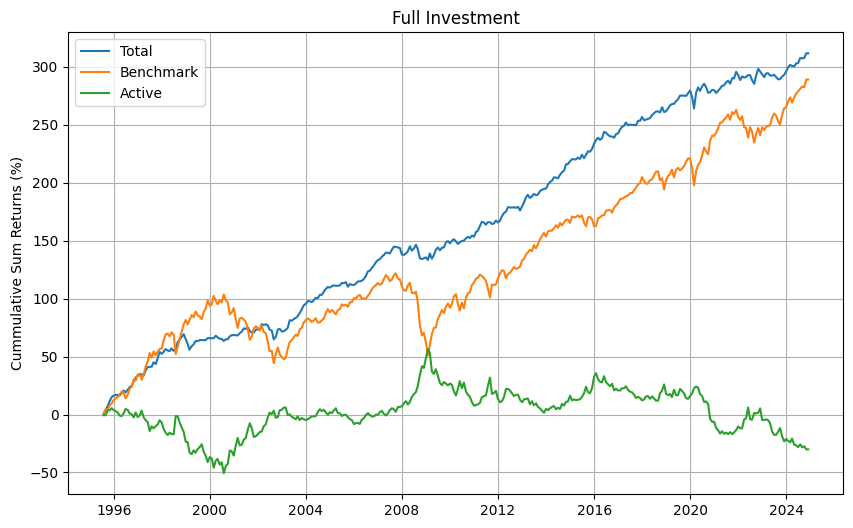

-------------------- Performance Summary --------------------

Start Date: 1995-07-31
End Date: 2024-12-31
Interval: Monthly
Periods: 353
Annualized: True

╭───────────────────┬─────────────┬─────────────┬──────────╮
│ Metric            │ Portfolio   │ Benchmark   │ Active   │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Return (Mean)     │ 11.01%      │ 11.11%      │ -0.10%   │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Risk              │ 8.70%       │ 15.73%      │ 13.60%   │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Sharpe Ratio      │ 1.27        │ 0.71        │          │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Information Ratio │ -0.01       │             │          │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Beta              │ 0.28        │ 1.00        │ -0.72    │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Alpha             │ 7.91%       │ -0.00%      │ 7

In [6]:
fi_df = pl.read_parquet(folder / "full_investment_bt.parquet")

fi_performance = Performance(
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    asset_returns=fi_df,
)

fi_performance.plot_returns(compounding=Compounding.SUM, title="Full Investment", decompose=True)

fi_df = fi_performance._portfolio_returns.with_columns(
    pl.lit("full_investment").alias("constraint")
)
fi_df_cum = fi_performance.get_returns(compounding=Compounding.SUM)
print(fi_performance)

Loading Barra Returns: 100%|██████████| 30/30 [00:02<00:00, 13.79it/s]


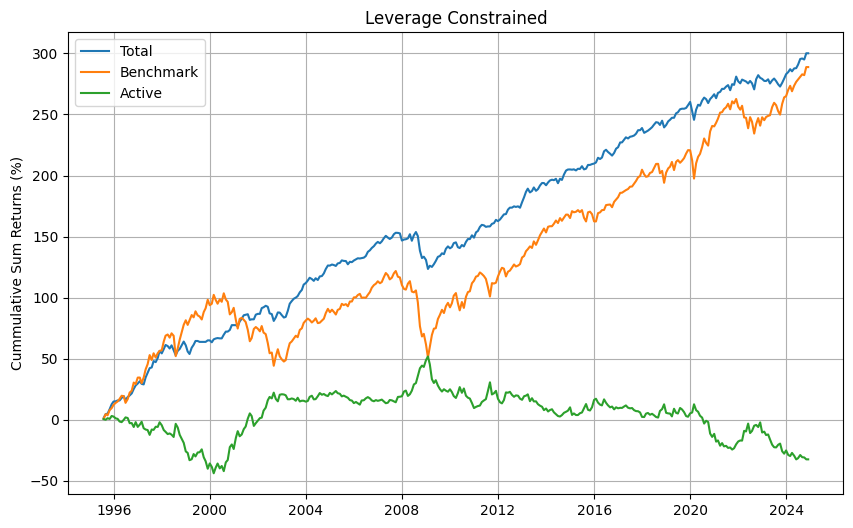

-------------------- Performance Summary --------------------

Start Date: 1995-07-31
End Date: 2024-12-31
Interval: Monthly
Periods: 353
Annualized: True

╭───────────────────┬─────────────┬─────────────┬──────────╮
│ Metric            │ Portfolio   │ Benchmark   │ Active   │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Return (Mean)     │ 10.64%      │ 11.11%      │ -0.47%   │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Risk              │ 8.89%       │ 15.73%      │ 11.27%   │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Sharpe Ratio      │ 1.20        │ 0.71        │          │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Information Ratio │ -0.04       │             │          │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Beta              │ 0.40        │ 1.00        │ -0.60    │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Alpha             │ 6.16%       │ -0.00%      │ 6

In [7]:
lev_df = pl.read_parquet(folder / "leverage_constrained_bt.parquet")

lev_performance = Performance(
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    asset_returns=lev_df,
)

lev_performance.plot_returns(
    compounding=Compounding.SUM, title="Leverage Constrained", decompose=True
)

lev_df = lev_performance._portfolio_returns.with_columns(pl.lit("leverage").alias("constraint"))
lev_df_cum = lev_performance.get_returns(compounding=Compounding.SUM)
print(lev_performance)

Loading Barra Returns: 100%|██████████| 30/30 [00:02<00:00, 13.31it/s]


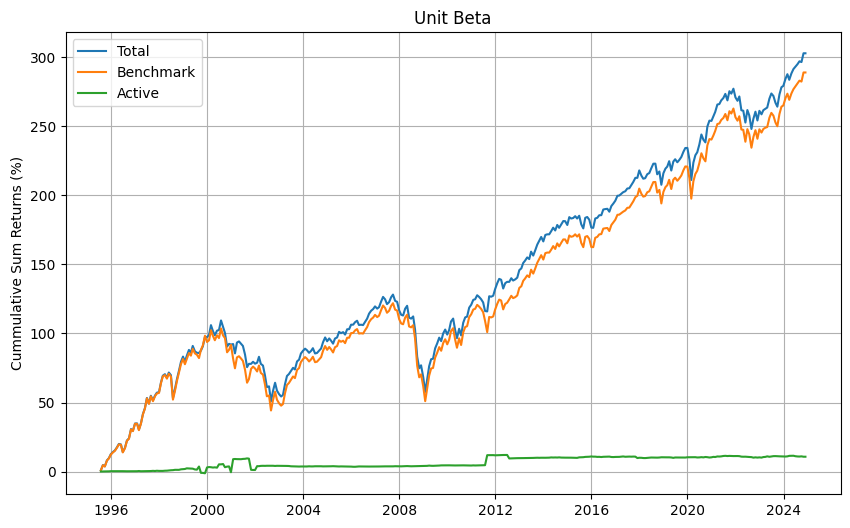

-------------------- Performance Summary --------------------

Start Date: 1995-07-31
End Date: 2024-12-31
Interval: Monthly
Periods: 353
Annualized: True

╭───────────────────┬─────────────┬─────────────┬──────────╮
│ Metric            │ Portfolio   │ Benchmark   │ Active   │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Return (Mean)     │ 11.52%      │ 11.11%      │ 0.42%    │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Risk              │ 15.36%      │ 15.73%      │ 3.24%    │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Sharpe Ratio      │ 0.75        │ 0.71        │          │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Information Ratio │ 0.13        │             │          │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Beta              │ 0.96        │ 1.00        │ -0.04    │
├───────────────────┼─────────────┼─────────────┼──────────┤
│ Alpha             │ 0.91%       │ -0.00%      │ 0

In [8]:
ub_df = pl.read_parquet(folder / "unit_beta_bt.parquet")

ub_performance = Performance(
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    asset_returns=ub_df,
)

ub_performance.plot_returns(compounding=Compounding.SUM, title="Unit Beta", decompose=True)
ub_df = ub_performance._portfolio_returns.with_columns(pl.lit("unit_beta").alias("constraint"))
ub_df_cum = ub_performance.get_returns(compounding=Compounding.SUM)
print(ub_performance)

In [9]:
total_return_df: pl.DataFrame = pl.concat([fi_df, lev_df, ub_df])

(
    total_return_df.group_by("constraint").agg(
        pl.col("total_ret")
        .mean()
        .truediv(pl.col("total_ret").std())
        .mul(np.sqrt(12))
        .alias("sharpe_ratio"),
        pl.col("active_ret")
        .mean()
        .truediv(pl.col("active_ret").std())
        .mul(np.sqrt(12))
        .alias("information_ratio"),
    )
)

constraint,sharpe_ratio,information_ratio
str,f64,f64
"""full_investment""",1.265667,-0.007191
"""leverage""",1.19672,-0.041395
"""unit_beta""",0.750344,0.12907


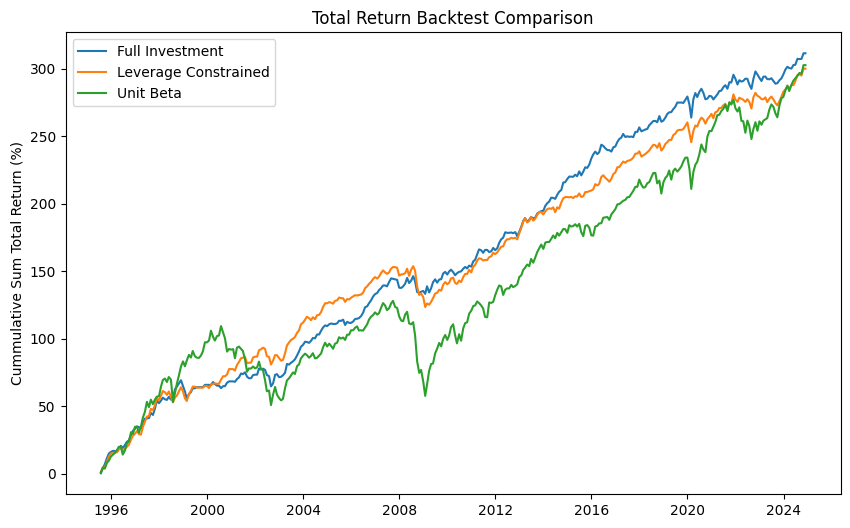

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(fi_df_cum, x="date", y="total_ret", label="Full Investment")
sns.lineplot(lev_df_cum, x="date", y="total_ret", label="Leverage Constrained")
sns.lineplot(ub_df_cum, x="date", y="total_ret", label="Unit Beta")

plt.title("Total Return Backtest Comparison")
plt.xlabel(None)
plt.ylabel("Cummulative Sum Total Return (%)")
plt.show()

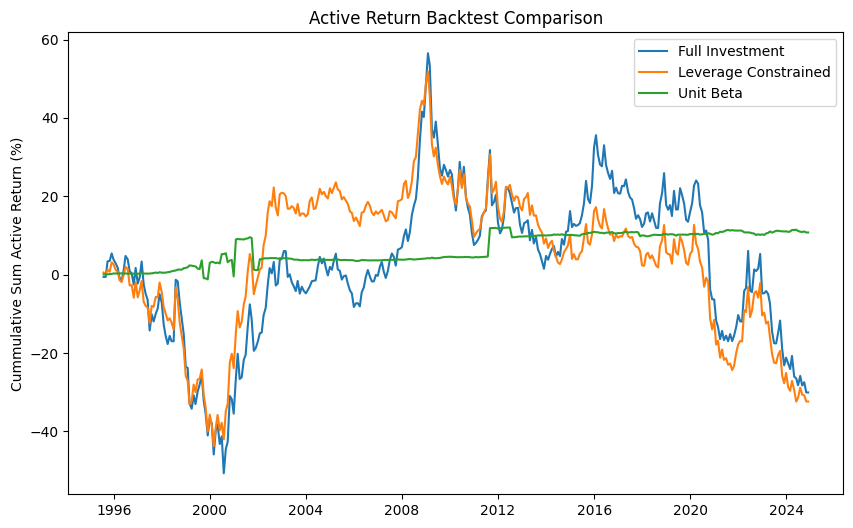

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(fi_df_cum, x="date", y="active_ret", label="Full Investment")
sns.lineplot(lev_df_cum, x="date", y="active_ret", label="Leverage Constrained")
sns.lineplot(ub_df_cum, x="date", y="active_ret", label="Unit Beta")

plt.title("Active Return Backtest Comparison")
plt.xlabel(None)
plt.ylabel("Cummulative Sum Active Return (%)")
plt.show()